CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

MEDV：自住房中位数价格，单位是千元"

In [8]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston["data"], 
                  columns=boston["feature_names"])
df["ans"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
from sklearn.model_selection import train_test_split
# [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(boston["data"], 
                                                    boston["target"], 
                                                    test_size=0.1)

In [10]:
#建模並訓練
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [11]:

from sklearn.metrics import accuracy_score
pre = reg.predict(x_test)
# accuracy_score(pre, y_test)
print(pre)
pre1 = reg.predict(x_train)
print(pre1)

[22.83608247 22.83608247 15.37083333 20.24193548 15.37083333 15.37083333
  9.43846154 15.37083333 20.46125    22.83608247 22.83608247 15.37083333
  9.43846154 20.24193548 20.46125     9.43846154 11.77142857 20.46125
 18.75555556 11.77142857 15.37083333 30.33225806 22.83608247 30.33225806
 20.46125    34.405      50.         18.75555556 10.4        18.75555556
 22.83608247 22.83608247 22.83608247 22.83608247 45.91666667 20.24193548
 22.83608247  9.43846154 18.75555556 20.24193548 20.24193548 27.75806452
 50.          9.43846154 20.46125     9.43846154 27.9        34.405
 20.46125    22.83608247 14.81891892]
[34.405      22.83608247 18.75555556 27.75806452 30.33225806 23.46666667
 20.46125     9.43846154 22.83608247 34.405      14.81891892 14.81891892
 30.33225806 22.83608247 45.91666667  9.43846154 36.95       27.75806452
 13.54166667 20.46125    20.46125    20.46125    15.37083333 13.54166667
 22.83608247 20.46125    20.46125    13.54166667 30.33225806 27.75806452
 20.46125    27.9    

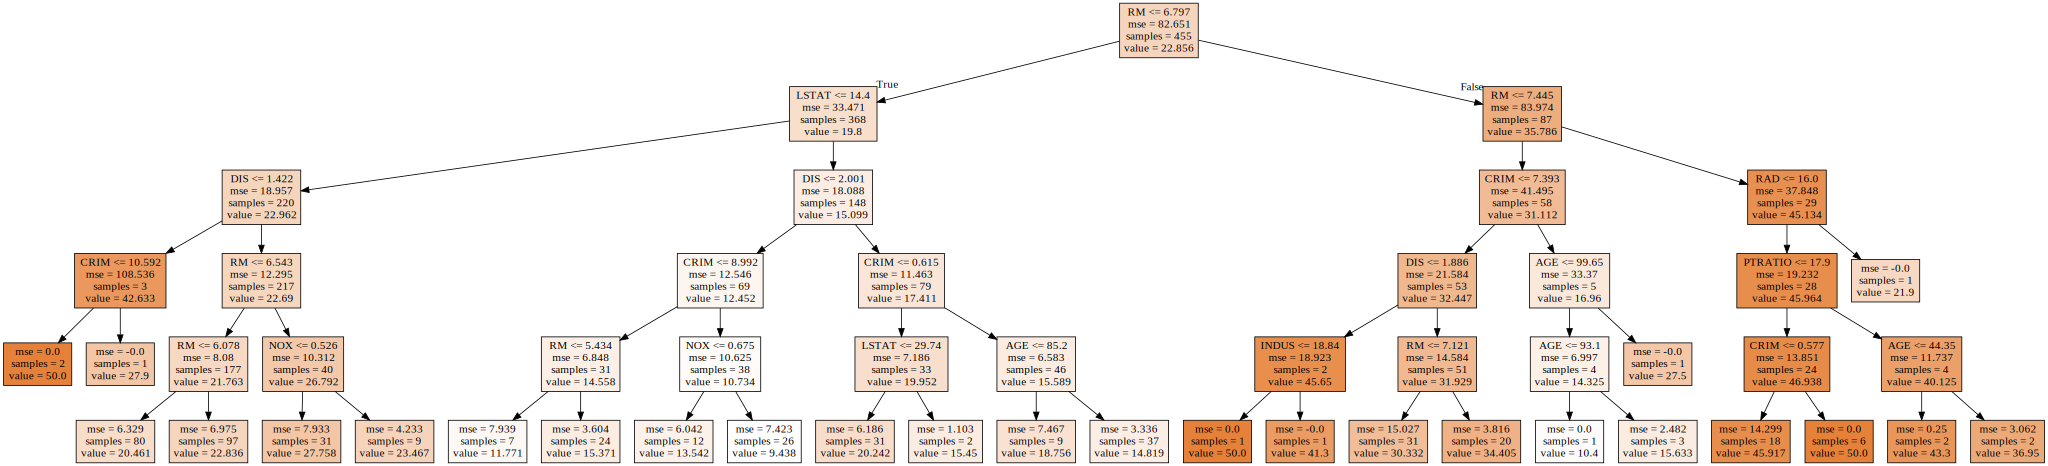

In [15]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg, 
                    feature_names=boston["feature_names"], 
                    filled=True)
graphviz.Source(g)

In [6]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.8102945321127808